# Explanatory about dataset German Credit

## 1. Import Libraries

In [ ]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Import Data

In [18]:
data=pd.read_csv('german_credit_data.csv', encoding='Latin1')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


### Quick-look Data

In [19]:
# Drop column Unnamed: 0

data=data.drop(['Unnamed: 0'], axis=1)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [98]:
#Get unique information in each variaables

print("Purpose : ",data.Purpose.unique())
print("Sex : ",data.Sex.unique())
print("Housing : ",data.Housing.unique())
print("Saving accounts : ",data['Saving accounts'].unique())
print("Checking account : ",data['Checking account'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  ['little' 'quite rich' 'rich' 'moderate']
Checking account :  ['little' 'moderate' 'rich']


In [20]:
# Get Information about number of rows and columns in data

data.shape

(1000, 9)

In [21]:
# Get Information about type data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


### Checking and Handling Missing Values

In [22]:
# Checking number of missing values each variables

count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

In [23]:
#Handle missing values in categorical data 'Checking account' and 'Saving accounts' using mode

data['Checking account'] = data['Checking account'].fillna(data['Checking account'].mode().values[0])
data['Saving accounts'] = data['Saving accounts'].fillna(data['Saving accounts'].mode().values[0])
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [24]:
#Cheking missing values after hanling this problem

count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

Purpose             0
Duration            0
Credit amount       0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
Age                 0
dtype: int64

### Formatting

In [34]:
#Formatting of data type
#Actually, Job must have type 'Object' but in this data Job is 'int', cause job is represented code of job title 
#0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

data['Job']=data['Job'].astype(int).astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null object
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


### Describe Numerical and Categorical Data

In [35]:
numerik=['Age', 'Credit amount', 'Duration']
Kategeorik=data.drop(numerik, axis=1)
numerical=data[numerik]
numerical.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


### Bivariat Analysis

In [109]:
numerical.corr(method = 'pearson').style.background_gradient().set_precision(2)

,Age,Credit amount,Duration
Age,1,0.033,-0.036
Credit amount,0.033,1,0.62
Duration,-0.036,0.62,1


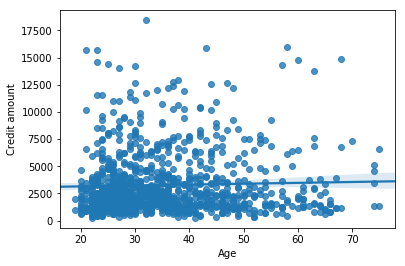

In [89]:
#create scatter plot of age and credit amount
sns.regplot(data['Age'],data['Credit amount'],fit_reg=True)

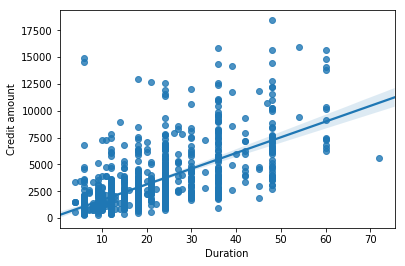

In [93]:
#create scatter plot of duration and credit amount

sns.regplot(data['Duration'],data['Credit amount'],fit_reg=True)

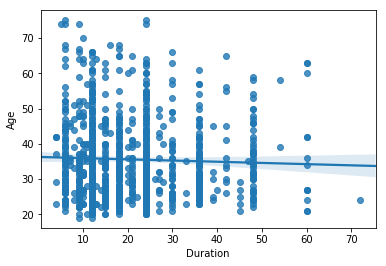

In [96]:
#create scatter plot of duration and age
sns.regplot(data['Duration'],data['Age'],fit_reg=True)

### Univariate analysis

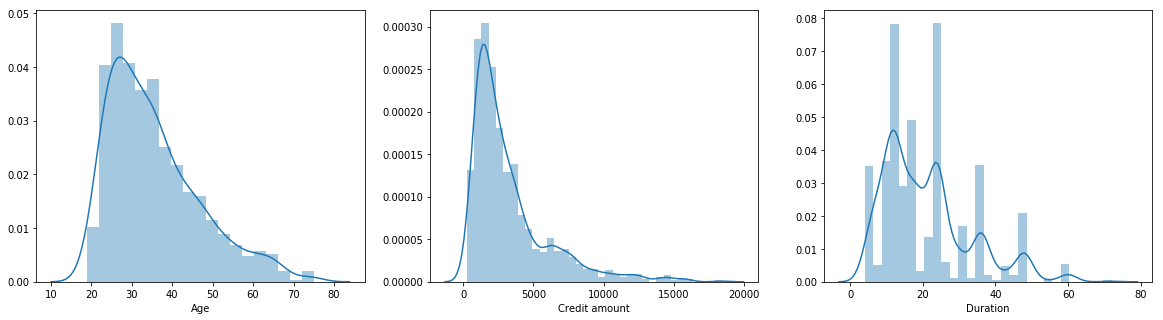

In [48]:
#get distribution plot of numerical data 
#from this, we will know how the data is spread

f=plt.figure(figsize=(20,5))
f.add_subplot(1,3,1)
sns.distplot(data['Age'])
f.add_subplot(1,3,2)
sns.distplot(data['Credit amount'])
f.add_subplot(1,3,3)
sns.distplot(data['Duration'])

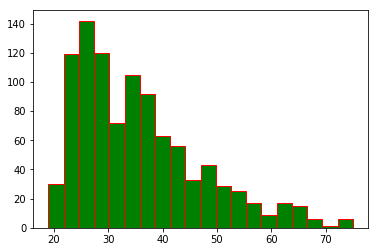

In [114]:
#Hisogram of data based Age

plt.hist(data['Age'], 
         facecolor='green', 
         edgecolor='red', 
         bins=20)
plt.show()

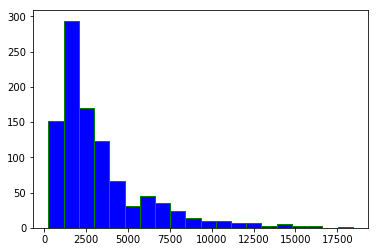

In [120]:
#Hisogram of data based Credit amount

plt.hist(data['Credit amount'], 
         facecolor='blue', 
         edgecolor='green', 
         bins=20)
plt.show()

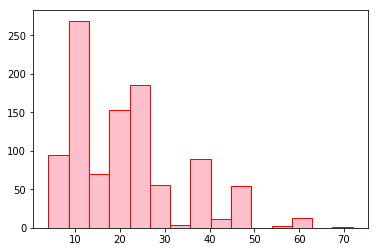

In [118]:
#Hisogram of data based duration

plt.hist(data['Duration'], 
         facecolor='pink', 
         edgecolor='red', 
         bins=15)
plt.show()

Text(0.5,0,'Type of Job')

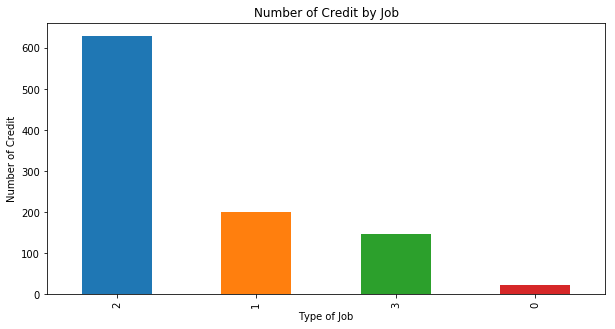

In [65]:
#Bar plot of Job that taking credit

data['Job'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Credit by Job")
plt.ylabel('Number of Credit')
plt.xlabel('Type of Job')

Text(0.5,0,'Type of Sex')

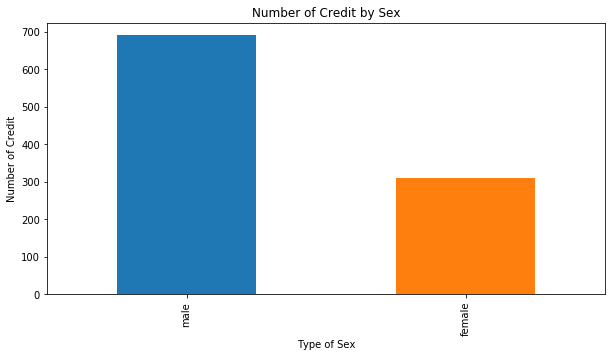

In [53]:
#Bar plot of Sex that taking credit

data['Sex'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Credit by Sex")
plt.ylabel('Number of Credit')
plt.xlabel('Type of Sex')

Text(0.5,0,'Type of Housing')

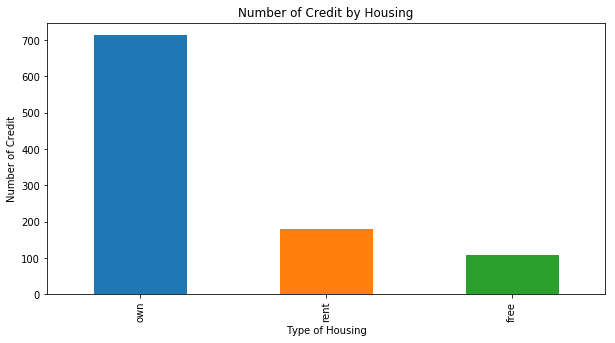

In [55]:
#Bar plot of Housing that taking credit

data['Housing'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Credit by Housing")
plt.ylabel('Number of Credit')
plt.xlabel('Type of Housing')

Text(0.5,1,'Distribution of Number Saving Accounts')

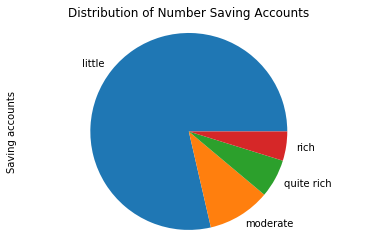

In [57]:
#Bar plot of saving account that taking credit

data['Saving accounts'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Distribution of Number Saving Accounts')

Text(0.5,1,'Distribution of Number Checking Accounts')

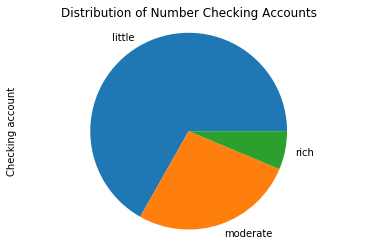

In [59]:
#Bar plot of Checkking accounts that taking credit

data['Checking account'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Distribution of Number Checking Accounts')

Text(0.5,0,'Type of Purpose')

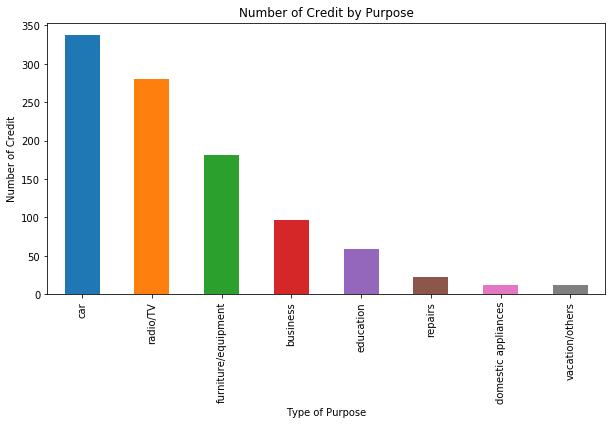

In [62]:
#Bar plot of Purpose that taking credit

data['Purpose'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Credit by Purpose")
plt.ylabel('Number of Credit')
plt.xlabel('Type of Purpose')

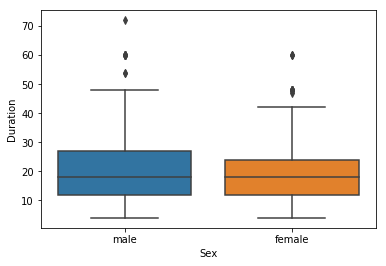

In [82]:
#Compare boxplot of Duration based Sex

sns.boxplot(y=data["Duration"], x=data['Sex'])

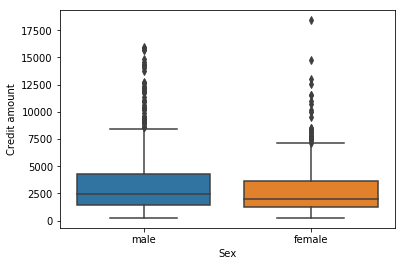

In [83]:
#Compare boxplot of Credit amount based Sex

sns.boxplot(y=data["Credit amount"], x=data['Sex'])

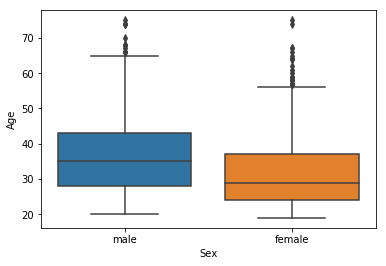

In [86]:
#Compare boxplot of Age based Sex

sns.boxplot(y=data["Age"], x=data['Sex'])

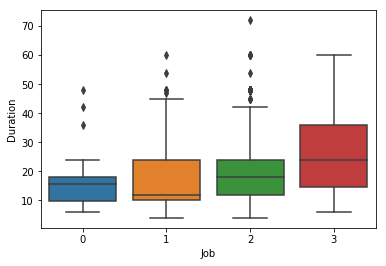

In [84]:
#Compare boxplot of Duration based Job

sns.boxplot(y=data["Duration"], x=data['Job'])

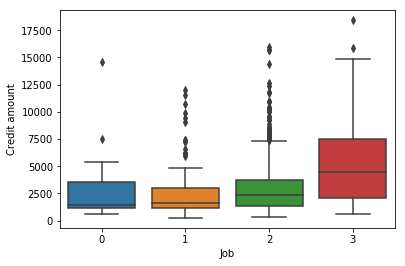

In [85]:
#Compare boxplot of Credit amount based Job

sns.boxplot(y=data["Credit amount"], x=data['Job'])

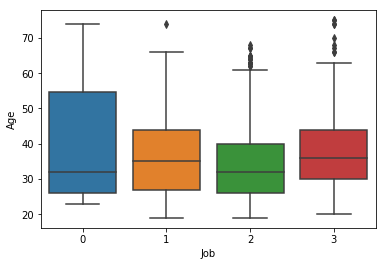

In [87]:
#Compare boxplot of Age based Job

sns.boxplot(y=data["Age"], x=data['Job'])

### Get Information of Data

In [75]:
#Get information about mean data based Job and sort by credit amount

groupjob=data.groupby(['Job']).mean()
groupjob.sort_values(by = 'Credit amount', ascending=False)

,Age,Credit amount,Duration
Job,,,
3,39.027027,5435.493243,25.168919
2,34.253968,3070.965079,21.411111
0,40.090909,2745.136364,17.363636
1,36.540000,2358.520000,16.535000


In [76]:
#Get information about mean data based Sex and sort by credit amount

groupsex=data.groupby(['Sex']).mean()
groupsex.sort_values(by = 'Credit amount', ascending=False)

,Age,Credit amount,Duration
Sex,,,
male,36.778261,3448.040580,21.56087
female,32.803226,2877.774194,19.43871


In [77]:
#Get information about mean data based Housing and sort by credit amount

grouphousing=data.groupby(['Housing']).mean()
grouphousing.sort_values(by = 'Credit amount', ascending=False)

,Age,Credit amount,Duration
Housing,,,
free,43.814815,4906.212963,27.453704
rent,30.368715,3122.553073,19.240223
own,35.593268,3060.939691,20.328191


In [79]:
#Get information about mean data based saving account and sort by credit amount

grouphousing=data.groupby(['Saving accounts']).mean()
grouphousing.sort_values(by = 'Credit amount', ascending=False)

,Age,Credit amount,Duration
Saving accounts,,,
moderate,33.019417,3384.038835,22.737864
little,35.669211,3355.134860,20.970738
rich,37.166667,2573.395833,18.312500
quite rich,36.904762,2572.111111,19.031746


In [81]:
#Get information about mean data based checking account and sort by credit amount

grouphousing=data.groupby(['Checking account']).mean()
grouphousing.sort_values(by = 'Credit amount', ascending=False)

,Age,Credit amount,Duration
Checking account,,,
moderate,34.081784,3827.561338,22.680297
little,35.980539,3150.377246,20.522455
rich,37.190476,2177.650794,17.349206


In [101]:
#Get the highest credit amount in data

credit_amount_sort=data.sort_values(by=['Credit amount'], ascending=False)
credit_amount_sort.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
915,32,female,3,own,little,moderate,18424,48,vacation/others


In [103]:
#Get the longest duration in data

duration_amount_sort=data.sort_values(by=['Duration'], ascending=False)
duration_amount_sort.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
677,24,male,2,own,moderate,moderate,5595,72,radio/TV


In [104]:
#Get the oldest age in data

age_sort=data.sort_values(by=['Age'], ascending=False)
age_sort.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
330,75,male,3,free,little,little,6615,24,car


In [105]:
#Get the smallest credit amount in data

credit_amount_sort1=data.sort_values(by=['Credit amount'])
credit_amount_sort1.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
725,41,female,1,own,rich,little,250,6,car


In [106]:
#Get the shortest Duration in data

duration_sort1=data.sort_values(by=['Duration'])
duration_sort1.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
314,29,male,1,own,little,rich,1494,4,car


In [107]:
#Get the youngest age in data

age_sort1=data.sort_values(by=['Age'])
age_sort1.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
391,19,female,1,rent,rich,moderate,983,12,furniture/equipment
